In [15]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F # import convolution functions like Relu
import matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html


## CPU oder GPU?
Torch erlaubt das Ausführen (vor allem der aufwändigen Lernphase) des künstlichen neuronalen Netzes auf CPU oder GPU. Ob die GPU zur Verfügung steht hängt von dem installierten Python-Paket und der Unterstützung der Grafikkarte durch Torch ab.

In [16]:

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


## Knünstliches Neuronale Netzwerke in Torch
In Torch werden neuronale Netzwerke wie durch Python-Klassen repräsentiert, die von der Klasse nn.Module erben.
Diese beinhalten die Netztopologie sowie die Berechnungsart.

In [17]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [18]:
# Define model
class NeuralNetworkSigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.Sigmoid(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [19]:
# Define model
class NeuralNetworkTanh(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [20]:
# Define model
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [21]:
# Define model
class SmallerNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 30),
            nn.ReLU(),
            nn.Linear(30, 30),
            nn.ReLU(),
            nn.Linear(30, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [22]:
# Define model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [36]:
# # Define model
# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()

#         # Define the layers of the CNN
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
#         self.relu1 = nn.ReLU()
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

#         self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.relu2 = nn.ReLU()
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

#         self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
#         self.relu3 = nn.ReLU()
#         self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

#         # Fully connected layers
#         self.fc1 = nn.Linear(64 * 4 * 4, 512)
#         self.relu4 = nn.ReLU()
#         self.fc2 = nn.Linear(512, 10)

#     def forward(self, x):
#         # Define the forward pass through the network
#         x = self.pool1(self.relu1(self.conv1(x)))
#         x = self.pool2(self.relu2(self.conv2(x)))
#         x = self.pool3(self.relu3(self.conv3(x)))

#         # Flatten the input for the fully connected layers
#         x = x.view(-1, 64 * 4 * 4)

#         x = self.relu4(self.fc1(x))
#         x = self.fc2(x)

#         return x

## Training des Netzes
Das Training eines Netzes definiert man am besten als eigene Funktion. Das Training folgt hierbei dem bereits aus der Vorlesung bekannten Backpropagation-Verfahren. Die Art der Optimierung, der ```optimizer```, kann durch verschiedene bereits implementierte Optimierer bestimmt werden. Siehe hierzu auch den Aufruf in der ```main()``` Methode 

In [23]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## Testing
Auch das Testing ist am besten als Funktion zu kapseln. Hierbei wird das aktuelle ```model```, also das aktuelle künstliche neuronale Netz mit den Testdaten geprüft. Diese dürfen nicht Teil des Trainings sein. 

In [24]:
def test(dataloader, model, loss_fn):
    # Get the size of the dataset and the number of batches
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Initialize variables to store test loss and correct predictions
    test_loss, correct = 0, 0
    
    # Lists to store details about misclassified samples
    misclassified_samples = []
    
    # Disable gradient computation during testing
    with torch.no_grad():
        # Iterate over batches in the dataloader
        for set, (X, y) in enumerate(dataloader, 1):  # Adding 1 to start indexing from 1
            # Move input data and labels to the device (e.g., GPU)
            X, y = X.to(device), y.to(device)
            
            # Forward pass to get predictions from the model
            pred = model(X)
            
            # Compute the test loss using the specified loss function
            test_loss += loss_fn(pred, y).item()
            
            # Count the number of correct predictions
            pred_argmax = pred.argmax(1)
            comparison = pred_argmax == y
            correct += (comparison).type(torch.float).sum().item()

            # y_list = y.tolist()
            # pred_list = pred.argmax(1).tolist()

            # for i in range(len(y_list)):
            #     # Check if the prediction is correct
            #     if pred_list[i] != y_list[i]:
            #         # Save details about misclassified sample
            #         misclassified_samples.append({
            #             'set': set,
            #             'index': i,
            #             'expected_label': y_list[i],
            #             'predicted_label': pred_list[i]
            #         })

    # Calculate average test loss and accuracy
    test_loss /= num_batches
    correct /= size
    
    # Print the test results
    accuracy = 100*correct
    print(f"Test Error: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {test_loss:>8f} \n")

    # Print details about misclassified samples
    # if misclassified_samples:
    #     print("Misclassified Samples:")
    #     for sample in misclassified_samples:
    #         print(f"Set {sample['set']} Index {sample['index']}: Expected {sample['expected_label']}, Predicted {sample['predicted_label']}")
    # else:
    #     print("All samples classified correctly.")
    
    return accuracy, test_loss # test result


## Die Hauptroutine
Hier passiert alles:
1. Die MNIST-Daten werden geladen und in Trainings- und Testdaten aufgeteilt
2. Die Lernparameter und Optimierungsstrategien werden festgelegt
3. Das Lernen erfolgt, gefolgt von einer Testphase pro Epoche.
4. Das Netz wird abgespeichert (so kann es schnell wieder geladen werden, ohne dass ein erneutes Training erfolgt)

In [25]:
def main(model):
    # Download training data from open datasets.
    training_data = datasets.MNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
    )

    # Download test data from open datasets.
    test_data = datasets.MNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
    )

    batch_size = 64

    # Create data loaders.
    train_dataloader = DataLoader(training_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)

    for X, y in test_dataloader:
        print(f"Shape of X [N, C, H, W]: {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}")
        break

    # model = NeuralNetwork().to(device)
    print(model)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    
    epochs = 10
    accuracies = []
    losses = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        accuracy, loss = test(test_dataloader, model, loss_fn)
        accuracies.append(accuracy)
        losses.append(loss)
    print("Done!")

    torch.save(model.state_dict(), "model.pth")
    print("Saved PyTorch Model State to model.pth")

    #model = NeuralNetwork().to(device)
    #model.load_state_dict(torch.load("model.pth"))

    classes = test_data.classes

    return accuracies, losses

In [26]:
accuracies, losses = main(NeuralNetwork().to(device)) # Accuracy: 97.8%, Avg loss: 0.071891

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.298929  [   64/60000]
loss: 0.754794  [ 6464/60000]
loss: 0.392049  [12864/60000]
loss: 0.349089  [19264/60000]
loss: 0.239739  [25664/60000]
loss: 0.314129  [32064/60000]
loss: 0.226010  [38464/60000]
loss: 0.397158  [44864/60000]
loss: 0.368231  [51264/60000]
loss: 0.268693  [57664/60000]
Test Error: 
 Accuracy: 93.1%, Avg loss: 0.224378 

Epoch 2
-------------------------------
loss: 0.167299  [   64/60000]
loss: 0.213291  [ 6464/60000]
loss: 0.102228  [12864/60000]
loss: 0.231587  [19264/60000]
loss: 0.140284  [25664/60000]
loss:

In [27]:
accuraciesSNN, lossesSNN = main(SmallerNeuralNetwork().to(device)) # Accuracy: 96.4%, Avg loss: 0.122912

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
SmallerNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.326734  [   64/60000]
loss: 1.137884  [ 6464/60000]
loss: 0.501873  [12864/60000]
loss: 0.391607  [19264/60000]
loss: 0.388934  [25664/60000]
loss: 0.338102  [32064/60000]
loss: 0.256938  [38464/60000]
loss: 0.440862  [44864/60000]
loss: 0.455364  [51264/60000]
loss: 0.280259  [57664/60000]
Test Error: 
 Accuracy: 91.5%, Avg loss: 0.278157 

Epoch 2
-------------------------------
loss: 0.231703  [   64/60000]
loss: 0.269123  [ 6464/60000]
loss: 0.143985  [12864/60000]
loss: 0.317095  [19264/60000]
loss: 0.218490  [25664/60000]
lo

In [28]:
accuraciesDNN, lossesDNN = main(DeepNeuralNetwork().to(device)) # Accuracy: 97.4%, Avg loss: 0.106785

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
DeepNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.307786  [   64/60000]
loss: 2.274999  [ 6464/60000]
loss: 1.688267  [12864/60000]
loss: 0.675226  [19264/60000]
loss: 0.413804  [25664/60000]
loss: 0.410731  [32064/60000]
loss: 0.245577  [38464/60000]
loss: 0.317737  [44864/60000]
loss: 0.332709  [51264/60000]
loss: 0.278457  [57664/60000]
Test Error: 
 Accuracy: 93.1%, Avg loss: 0.222184 

Epoch 2
---------------------------

In [29]:
accuraciesSimpleNN, lossesSimpleNN = main(SimpleNN().to(device)) # Accuracy: 97.3%, Avg loss: 0.087829 

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.306673  [   64/60000]
loss: 0.562822  [ 6464/60000]
loss: 0.365037  [12864/60000]
loss: 0.387055  [19264/60000]
loss: 0.260795  [25664/60000]
loss: 0.327780  [32064/60000]
loss: 0.202722  [38464/60000]
loss: 0.401744  [44864/60000]
loss: 0.335742  [51264/60000]
loss: 0.355207  [57664/60000]
Test Error: 
 Accuracy: 92.5%, Avg loss: 0.259895 

Epoch 2
-------------------------------
loss: 0.224933  [   64/60000]
loss: 0.229185  [ 6464/60000]
loss: 0.162698  [12864/60000]
loss: 0.290176  [19264/60000]
loss: 0.176060  [25664/60000]
loss: 0.240902  [32064/60000]
loss: 0.116334  [38464/60000]
loss: 0.302195  [44864/60000

In [30]:
accuraciesSigmoid, lossesSigmoid = main(NeuralNetworkSigmoid().to(device)) # Accuracy: 92.4%, Avg loss: 0.257998

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
NeuralNetworkSigmoid(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.357145  [   64/60000]
loss: 2.330405  [ 6464/60000]
loss: 2.266830  [12864/60000]
loss: 2.266003  [19264/60000]
loss: 2.211008  [25664/60000]
loss: 2.098756  [32064/60000]
loss: 1.705812  [38464/60000]
loss: 1.518517  [44864/60000]
loss: 1.156535  [51264/60000]
loss: 0.906745  [57664/60000]
Test Error: 
 Accuracy: 70.2%, Avg loss: 0.898170 

Epoch 2
-------------------------------
loss: 0.965846  [   64/60000]
loss: 0.823326  [ 6464/60000]
loss: 0.769077  [12864/60000]
loss: 0.643856  [19264/60000]
loss: 0.653759  [25664

In [31]:
accuraciesTanh, lossesTanh = main(NeuralNetworkTanh().to(device)) # Accuracy: 97.2%, Avg loss: 0.089091

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
NeuralNetworkTanh(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Tanh()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Tanh()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.296761  [   64/60000]
loss: 0.487362  [ 6464/60000]
loss: 0.347121  [12864/60000]
loss: 0.355354  [19264/60000]
loss: 0.246088  [25664/60000]
loss: 0.351614  [32064/60000]
loss: 0.244388  [38464/60000]
loss: 0.488900  [44864/60000]
loss: 0.468262  [51264/60000]
loss: 0.433012  [57664/60000]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.301840 

Epoch 2
-------------------------------
loss: 0.225220  [   64/60000]
loss: 0.281975  [ 6464/60000]
loss: 0.151157  [12864/60000]
loss: 0.283806  [19264/60000]
loss: 0.207756  [25664/60000]
l

In [38]:
#accuraciesCNN, lossesCNN = main(SimpleCNN().to(device))

Text(0, 0.5, 'Percentage')

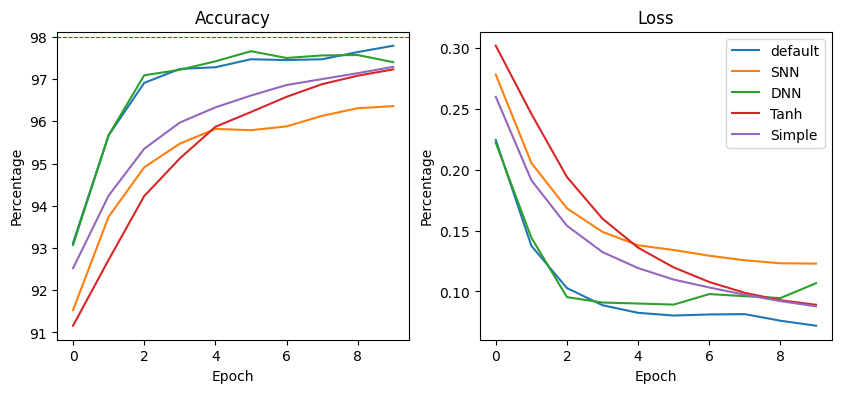

In [33]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(accuracies, label="default")
plt.plot(accuraciesSNN, label="SNN")
plt.plot(accuraciesDNN, label="DNN")
#plt.plot(accuraciesSigmoid, label="Sigmoid")
plt.plot(accuraciesTanh, label="Tanh")
plt.plot(accuraciesSimpleNN, label="Simple")
plt.axhline(y=98, color='r', linestyle='--', linewidth=0.75)
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Percentage")
plt.subplot(122)
plt.plot(losses, label="default")
plt.plot(lossesSNN, label="SNN")
plt.plot(lossesDNN, label="DNN")
#plt.plot(lossesSigmoid, label="Sigmoid")
plt.plot(lossesTanh, label="Tanh")
plt.plot(lossesSimpleNN, label="Simple")
plt.legend()
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Percentage")